In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [55]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [57]:
df.sample(4)

,N,P,K,temperature,humidity,ph,rainfall,label
1882,31,13,33,29.699523,95.212244,6.342464,148.300369,coconut
787,44,55,25,29.632105,65.913600,7.421608,71.163320,blackgram
220,26,80,83,17.084985,16.145658,7.528600,71.310073,chickpea
1554,2,131,199,22.474205,91.227597,6.017370,124.217970,apple


In [58]:
df.shape

(2200, 8)

In [59]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [60]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [61]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [62]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [63]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [64]:
df.duplicated().sum()

0

In [65]:
corr = df.corr(numeric_only = True)

In [66]:
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

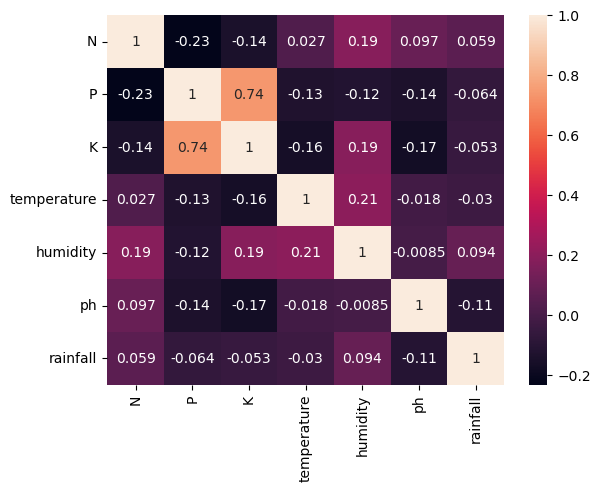

In [67]:
sns.heatmap(corr,annot = True)

In [68]:
df["label"].unique().size

22

#  Distribution of data towards the labels:


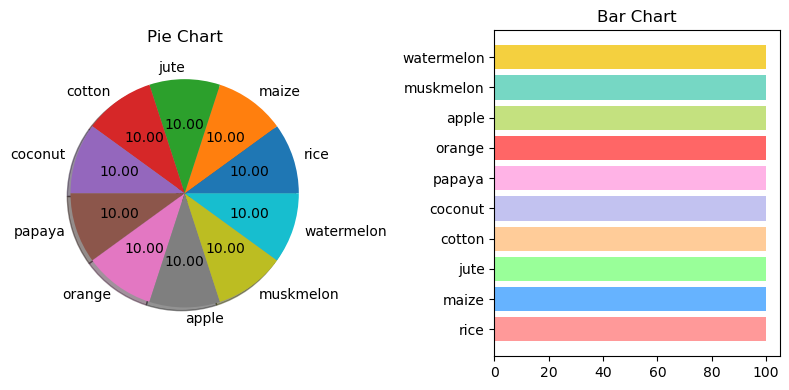

In [69]:
val_cnt_lab = df.label.value_counts()[:10]
fig,ax = plt.subplots(1,2,figsize = (8,4))
ax[0].pie(val_cnt_lab,labels = val_cnt_lab.index,autopct = "%.2f",shadow = True)
ax[0].set_title("Pie Chart")
ax[1].barh(val_cnt_lab.index,val_cnt_lab)

# Bar chart with custom colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff6666','#c4e17f','#76d7c4','#f4d03f']
ax[1].barh(val_cnt_lab.index,val_cnt_lab,color = colors)
ax[1].set_title("Bar Chart")
##show plot
plt.tight_layout()
plt.show()

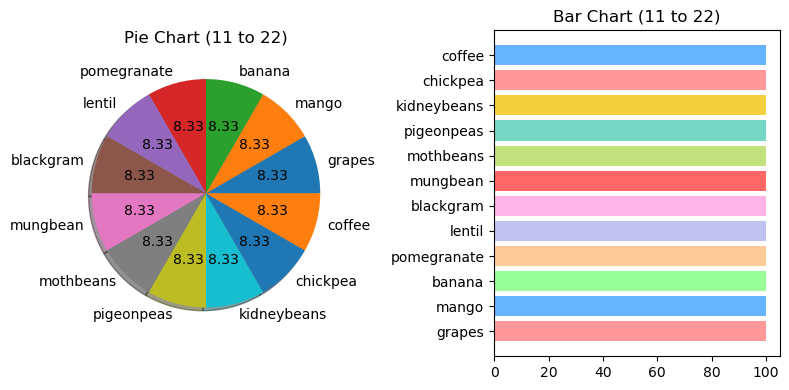

In [70]:
val_cnt_lab = df.label.value_counts()[10:22]
fig,ax = plt.subplots(1,2,figsize = (8,4))
# Pie chart
ax[0].pie(val_cnt_lab,labels = val_cnt_lab.index,autopct = "%.2f",shadow = True)
ax[0].set_title("Pie Chart (11 to 22)")
ax[1].barh(val_cnt_lab.index,val_cnt_lab)

# Bar chart with custom colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff6666','#c4e17f','#76d7c4','#f4d03f']
ax[1].barh(val_cnt_lab.index,val_cnt_lab,color = colors)
ax[1].set_title("Bar Chart (11 to 22)")
##show plot
plt.tight_layout()
plt.show()

# Distribution of the data among the continuoes values

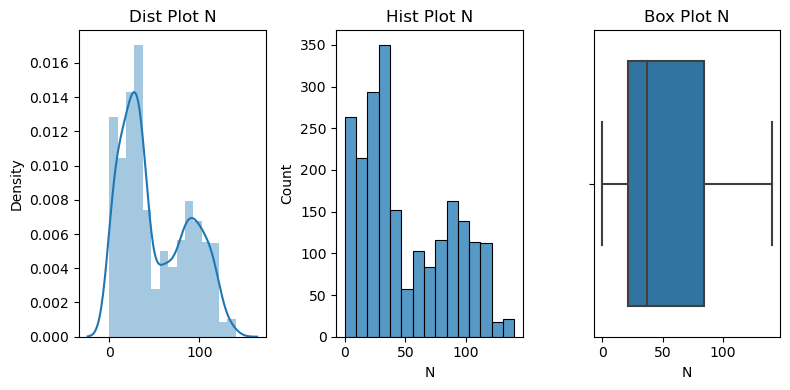

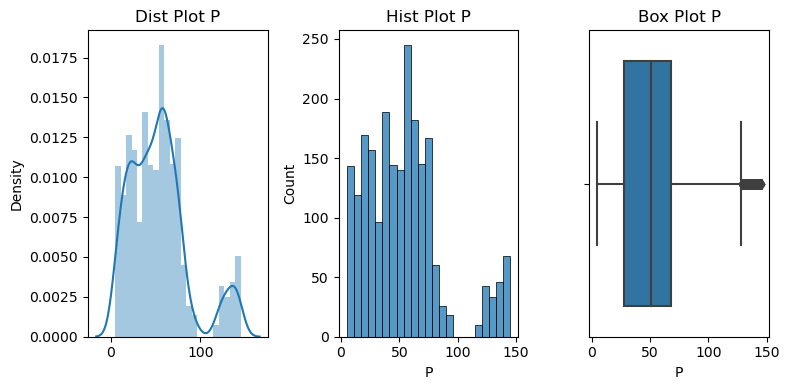

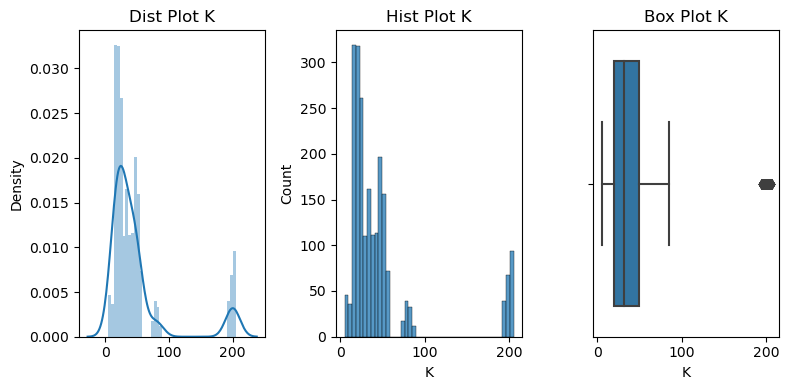

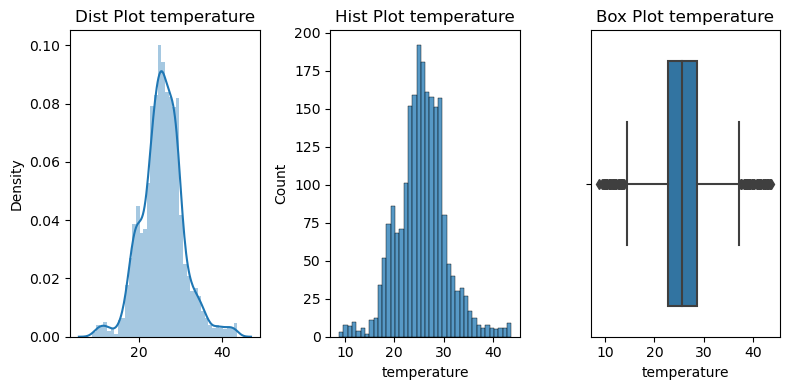

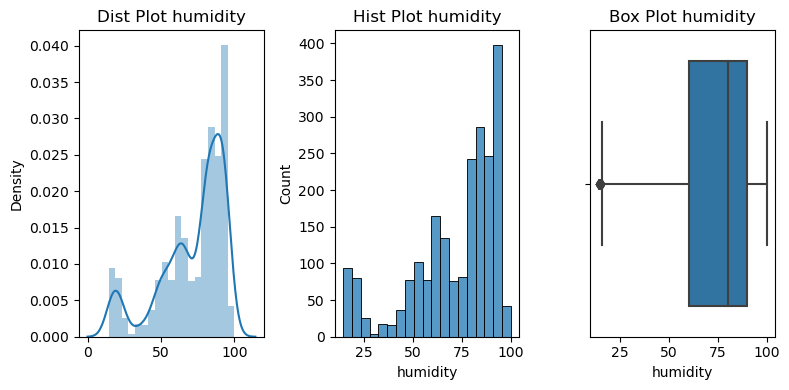

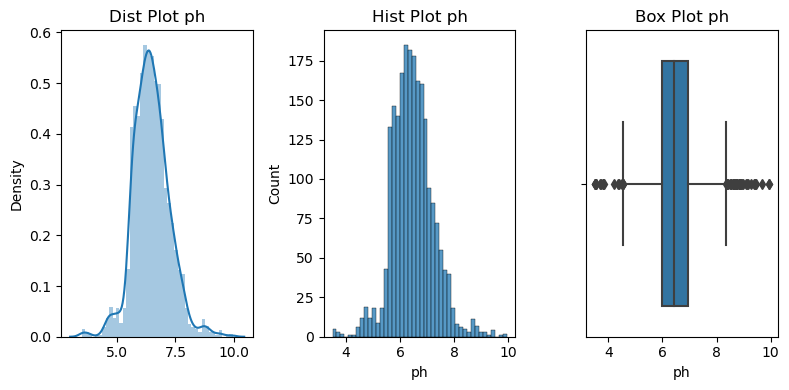

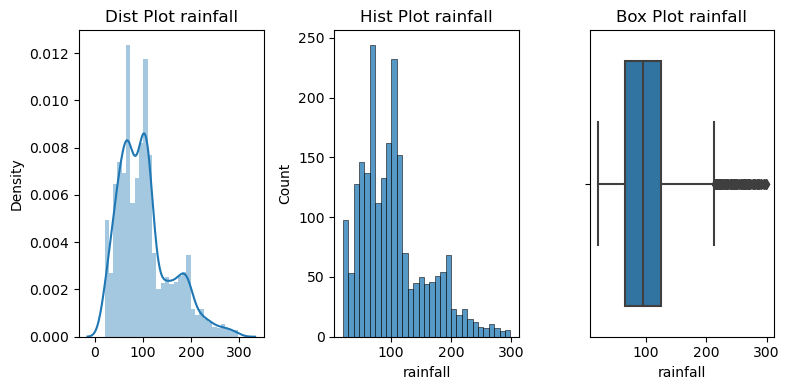

In [71]:
import warnings
warnings.filterwarnings("ignore")
cols = df.columns
# iterate over the column and then make a plot

for i in cols[:-1]:
    fig, ax = plt.subplots(1, 3, figsize=(8, 4))
    
    # Distribution plot
    sns.distplot(x=df[i], ax=ax[0], kde=True)
    ax[0].set_title(f"Dist Plot {i}")  
    
    # Histogram plot
    sns.histplot(x=df[i], ax=ax[1])
    ax[1].set_title(f"Hist Plot {i}") 
    
    # Box plot
    sns.boxplot(data=df, x=i, ax=ax[2])
    ax[2].set_title(f"Box Plot {i}") 
    
    plt.tight_layout()
    plt.show()

 


   


# Convert the labels in to numbers 

In [72]:
dic = {}
val_cnt_lab = df.label.value_counts()
for i,val in enumerate(val_cnt_lab.index):
    dic[val]= i

In [73]:
dic

{'rice': 0,
 'maize': 1,
 'jute': 2,
 'cotton': 3,
 'coconut': 4,
 'papaya': 5,
 'orange': 6,
 'apple': 7,
 'muskmelon': 8,
 'watermelon': 9,
 'grapes': 10,
 'mango': 11,
 'banana': 12,
 'pomegranate': 13,
 'lentil': 14,
 'blackgram': 15,
 'mungbean': 16,
 'mothbeans': 17,
 'pigeonpeas': 18,
 'kidneybeans': 19,
 'chickpea': 20,
 'coffee': 21}

In [74]:
df["label"] = df["label"].map(dic)

In [75]:
df.sample(5)


,N,P,K,temperature,humidity,ph,rainfall,label
1326,91,21,50,24.335282,81.440304,6.762030,48.321136,9
1129,34,16,25,30.072026,50.960405,6.107296,92.096098,11
1994,106,46,20,23.438217,78.633888,6.200672,81.150721,3
2116,80,15,28,23.114387,68.000960,6.703271,161.894462,21
210,58,66,79,20.993736,19.334704,8.718193,93.552801,20


In [76]:
x = df.drop("label",axis = 1)
y = df["label"]





  

In [77]:
x.head(4)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034


In [78]:
y.head()


0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
                                                

In [80]:
x_train.shape

(1760, 7)

In [81]:
x_test.shape

(440, 7)

In [82]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
x_train = mx.fit_transform(x_train)
x_test = mx.transform(x_test)

In [83]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [84]:
x_test

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93872187, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84296447, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92264534, 0.5344578 ,
        0.33938901],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.75864563, 0.6560289 ,
        0.18741185],
       [0.82857143, 0.33571429, 0.07      , ..., 0.71286229, 0.40585322,
        0.16793744],
       [0.03571429, 0.45      , 0.075     , ..., 0.21974075, 0.40696371,
        0.48530014]])

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [87]:
models = { 
    "LogisticRegression":LogisticRegression(),
    "GaussianNB":GaussianNB(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreeClassifier":ExtraTreeClassifier(),
    "BaggingClassifier":BaggingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier() 
}

In [92]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    print(f"{name}mode with accuracy:{score}")
    

LogisticRegressionmode with accuracy:0.9204545454545454
GaussianNBmode with accuracy:0.9954545454545455
KNeighborsClassifiermode with accuracy:0.9704545454545455
DecisionTreeClassifiermode with accuracy:0.9840909090909091
ExtraTreeClassifiermode with accuracy:0.9318181818181818
BaggingClassifiermode with accuracy:0.990909090909091
RandomForestClassifiermode with accuracy:0.9931818181818182
AdaBoostClassifiermode with accuracy:0.1409090909090909


In [94]:
randclf = RandomForestClassifier()
randclf.fit(x_train,y_train)
y_pred = randclf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9931818181818182

In [95]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.transform(features)
    prediction = randclf.predict(mx_features).reshape(1,-1)
    return prediction[0]
    

In [96]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0


In [98]:
N = 90
P = 42
K = 43
temperature = 20.879744
humidity = 82.002744
ph = 6.502985
rainfall = 202.935536
recommendation(N,P,K,temperature,humidity,ph,rainfall)

array([0], dtype=int64)

In [99]:
df.sample(2)

,N,P,K,temperature,humidity,ph,rainfall,label
43,82,40,40,23.830675,84.813601,6.271479,298.560117,0
54,95,52,36,26.229169,83.836258,5.543360,286.508373,0


In [100]:
N = 82
P = 40
K = 40
temperature = 23.830675
humidity = 84.813601
ph = 6.271479
rainfall = 298.560117
recommendation(N,P,K,temperature,humidity,ph,rainfall)

array([0], dtype=int64)

In [101]:
df.sample(4)

,N,P,K,temperature,humidity,ph,rainfall,label
1127,8,33,29,29.980805,49.486133,6.442393,91.822716,11
1916,135,43,16,23.479869,81.730491,6.720450,86.762879,3
91,90,44,38,23.835095,83.883871,7.473134,241.201351,0
1973,117,51,15,22.953571,78.715558,6.044557,99.753362,3


In [102]:
N = 8
P = 33
K = 29
temperature = 29.980805
humidity = 49.486133
ph = 6.442393
rainfall = 91.822716
recommendation(N,P,K,temperature,humidity,ph,rainfall)

array([11], dtype=int64)

In [104]:
import pickle
pickle.dump(randclf,open("model.pkl","wb"))
pickle.dump(mx,open("minmaxscaler.pkl","wb"))

In [ ]:
loaded_model = pickle.load(open("model.pkl", "rb"))

# Load the saved scaler
loaded_scaler = pickle.load(open("minmaxscaler.pkl", "rb"))

# Example usage
new_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
scaled_features = loaded_scaler.transform(new_features)
prediction = loaded_model.predict(scaled_features)
print(prediction)